<a href="https://colab.research.google.com/github/bhavita/CovidPrediction/blob/IEEEDataSetCreator/CovidXrayDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset chestxray

Cloning into 'chestxray'...
remote: Enumerating objects: 3599, done.
remote: Total 3599 (delta 0), reused 0 (delta 0), pack-reused 3599
Receiving objects: 100% (3599/3599), 712.16 MiB | 40.90 MiB/s, done.
Resolving deltas: 100% (1424/1424), done.
Checking out files: 100% (1123/1123), done.


In [ ]:
import pandas as pd

In [ ]:
METADATA_FILE_PATH = "chestxray/metadata.csv"
IMAGE_PATH = "chestxray/images"

In [ ]:
df = pd.read_csv(METADATA_FILE_PATH)
df.head(5)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [ ]:
import os
import shutil

In [ ]:
DATA_SET_COVID = "DataSet/Covid"
if not os.path.exists(DATA_SET_COVID):
  os.makedirs(DATA_SET_COVID+"/Val")
  os.makedirs(DATA_SET_COVID+"/Train")
  print("Creating DataSet for Covid")

Creating DataSet for Covid


In [ ]:
covid_cases = 0

#Iterate over all rows and find out profiles having xray and covid-19 
images = []

for(i,row) in df.iterrows():
  if(row["finding"] == "COVID-19" and row["view"]=="PA"):
    filename=row["filename"]
    image_path=os.path.join(IMAGE_PATH,filename)
    type = "Val" if i%3 ==0 else "Train"
    target_path= os.path.join(DATA_SET_COVID,os.path.join(type,filename))
    print(target_path)
    shutil.copy2(image_path,target_path)
    images.append(target_path)
    covid_cases+=1;

print("Added dataset of %d cases" % (covid_cases))


DataSet/Covid/Val/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
DataSet/Covid/Train/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
DataSet/Covid/Train/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
DataSet/Covid/Val/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
DataSet/Covid/Train/nejmc2001573_f1a.jpeg
DataSet/Covid/Train/nejmc2001573_f1b.jpeg
DataSet/Covid/Train/lancet-case2a.jpg
DataSet/Covid/Train/lancet-case2b.jpg
DataSet/Covid/Train/1-s2.0-S0140673620303706-fx1_lrg.jpg
DataSet/Covid/Val/nCoV-radiol.2020200269.fig1-day7.jpeg
DataSet/Covid/Train/nejmoa2001191_f1-PA.jpeg
DataSet/Covid/Val/nejmoa2001191_f3-PA.jpeg
DataSet/Covid/Train/nejmoa2001191_f4.jpeg
DataSet/Covid/Val/nejmoa2001191_f5-PA.jpeg
DataSet/Covid/Train/ryct.2020200034.fig2.jpeg
DataSet/Covid/Val/ryct.2020200034.fig5-day0.jpeg
DataSet/Covid/Train/ryct.2020200034.fig5-day4.jpeg
DataSet/Covid/Train/ryct.2020200034.fig5-day7.jp

Positive cases


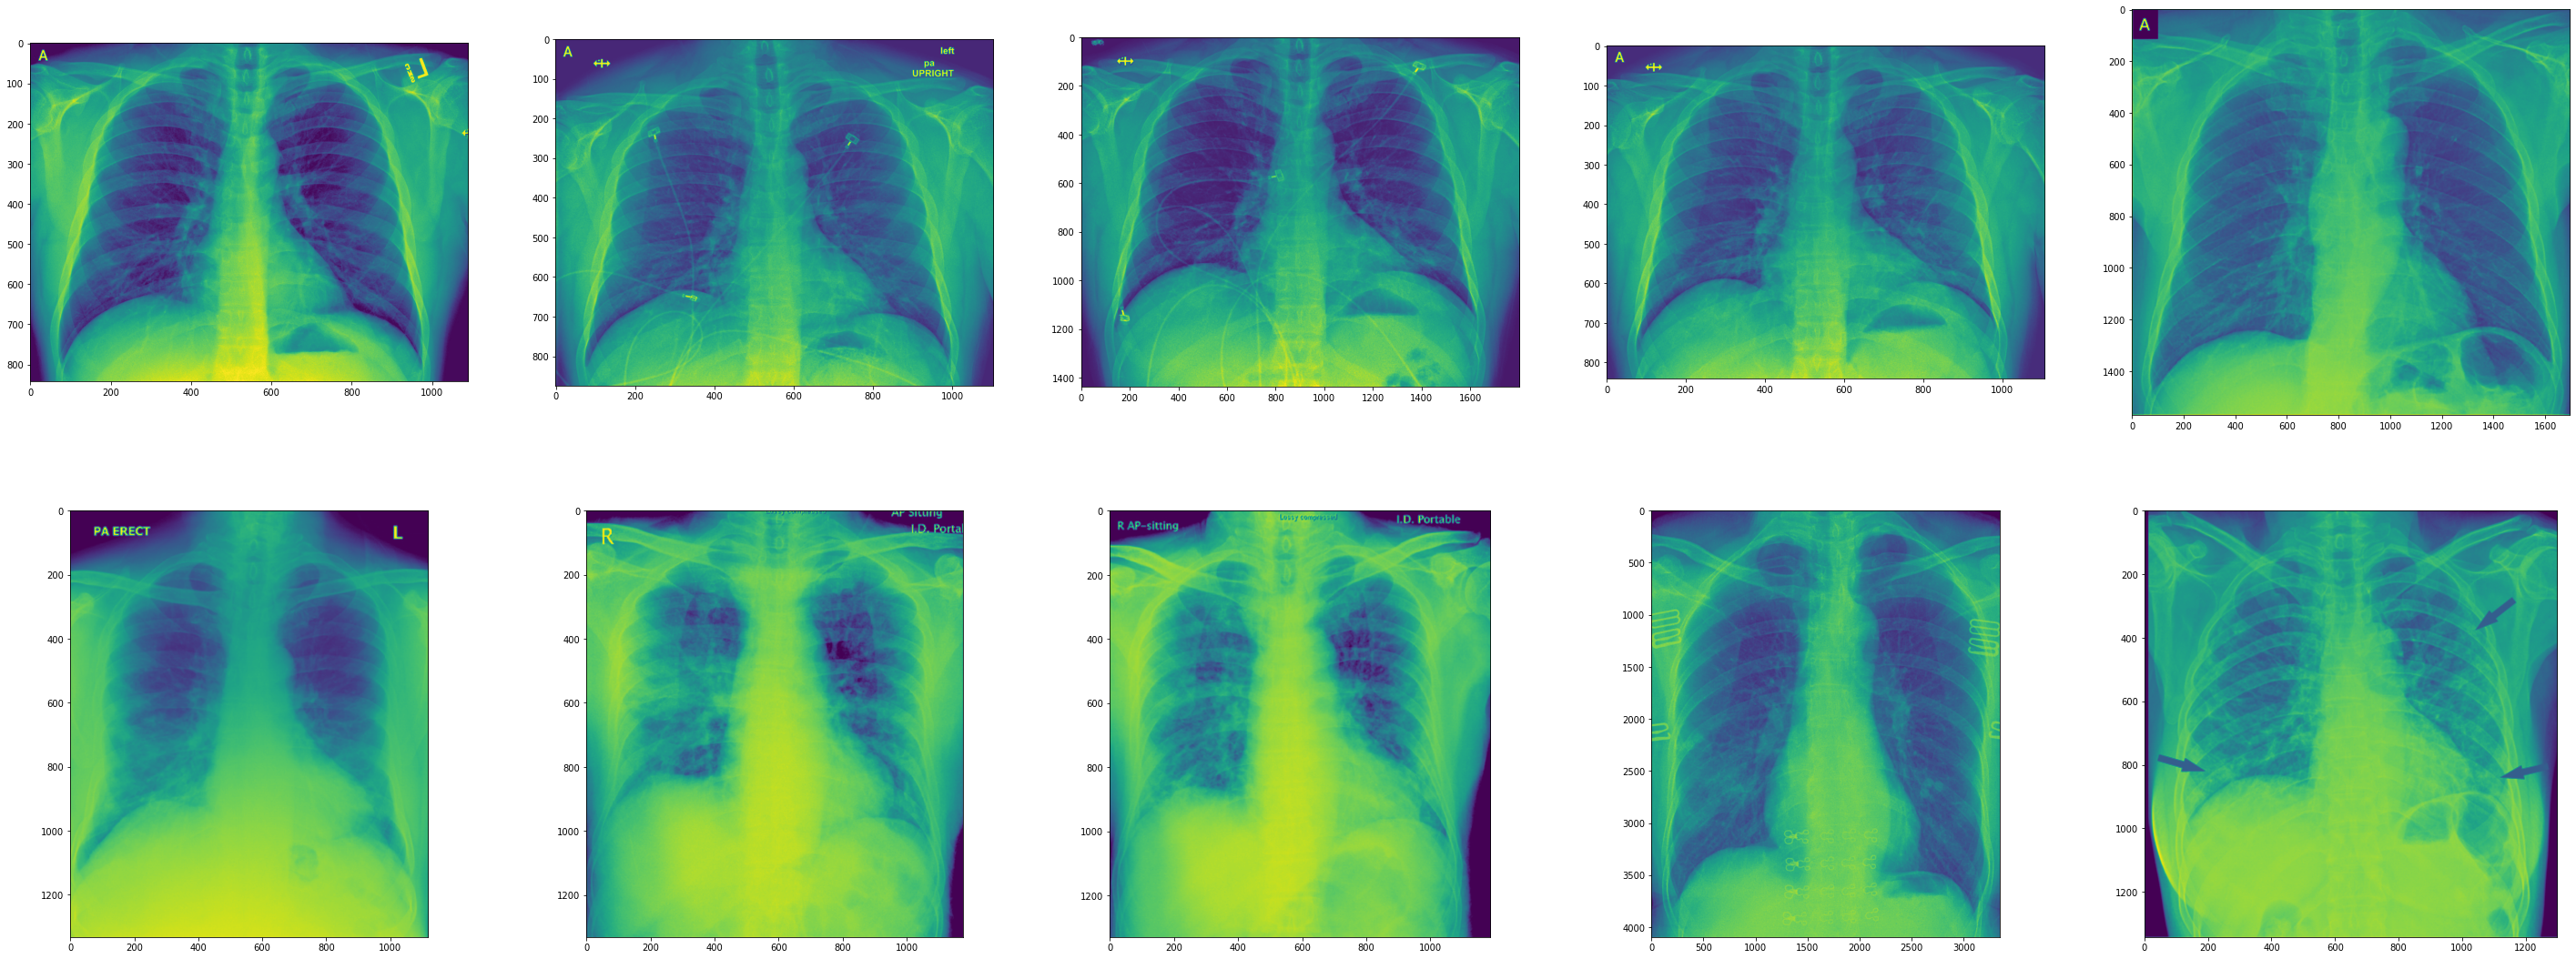

In [ ]:
from matplotlib import pyplot as plt
import cv2

print("Positive cases")

f = plt.figure(figsize=(50,50)) # specifying the overall grid size

for i in range(10,20):
  img = cv2.imread(images[i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  f.add_subplot(5,5,i+1);
  plt.imshow(gray)

plt.show(block=True)

In [81]:
!zip -r DataSet.zip DataSet
from google.colab import files
files.download("DataSet.zip")

  adding: DataSet/ (stored 0%)
  adding: DataSet/Covid/ (stored 0%)
  adding: DataSet/Covid/Train/ (stored 0%)
  adding: DataSet/Covid/Train/48c4542c.jpg (deflated 0%)
  adding: DataSet/Covid/Train/article_river_e4d185c06e3511eaa2321d8ab357a1de-c1mn.png (deflated 0%)
  adding: DataSet/Covid/Train/nejmc2001573_f1b.jpeg (deflated 5%)
  adding: DataSet/Covid/Train/41591_2020_819_Fig1_HTML.webp-day5.png (deflated 0%)
  adding: DataSet/Covid/Train/c3829ecb.jpg (deflated 0%)
  adding: DataSet/Covid/Train/41182_2020_203_Fig3_HTML.jpg (deflated 0%)
  adding: DataSet/Covid/Train/fff49165-b22d-4bb4-b9d1-d5d62c52436c.annot.original.png (deflated 0%)
  adding: DataSet/Covid/Train/40779_2020_233_Fig2_HTML-a.png (deflated 0%)
  adding: DataSet/Covid/Train/1-s2.0-S2214250920300834-gr1_lrg-c.png (deflated 1%)
  adding: DataSet/Covid/Train/f6d980a0.jpg (deflated 0%)
  adding: DataSet/Covid/Train/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg (deflated 1%)
  adding: DataSet/Covid/Train/F4341CE7-73C9-45C6-99C

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>